In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import requests
import json
from config import api_key
print(api_key)
import pprint 

b236ee994a5d48069c1184151181011


In [11]:
# Save config information.
#variables to append queried API data for each citiers for historical weather

#capture list of PJM Cities
path = "Resources/AECO city.csv"
city_data = pd.read_csv(path)
#cities = city_data['city_state']
cities = ["Pittsburgh, PA"]
print('test')

# humidity = []
# wind_speed = []
# city_name = []
# precip = []
# condition = []
# avg_temp= []
# date_new=[]

# #http://api.apixu.com/v1/search.json?key=<YOUR_API_KEY>&q=lond
# historic_url = "http://api.apixu.com/v1/history.json?"
# forecast_url = "http://api.apixu.com/v1/forecast.json?"
# current_url = "http://api.apixu.com/v1/current.json?"
# units = "imperial"
# Build partial query URL
# current_query_url = "http://api.apixu.com/v1/history.json?key=b236ee994a5d48069c1184151181011&q=91913&dt=2018-11-06"
# historical request, dt should be in yyyy-MM-dd format after 1st Jan, 2015

# historic_query_url = f"{historic_url}key={api_key}&q="
# response = requests.get(current_query_url).json()

# cities.head()
# print("Begining Data Retrieval") 
# print("------------------------") 
# dates = ['2018-11-05','2018-11-06', '2018-11-07', '2018-11-08','2018-11-09']
# for date in dates:
#     for city in cities:
#         try:
#             city_url = historic_query_url + city+"&dt="+date
#             print(city_url)
#             response = requests.get(city_url).json()
#             #print(response)
#             avg_temp.append(response['forecast']['forecastday'][0]['day']['avgtemp_f'])
#             humidity.append(response['forecast']['forecastday'][0]['day']['avghumidity'])
#             wind_speed.append(response['forecast']['forecastday'][0]['day']['maxwind_mph'])
#             precip.append(response['forecast']['forecastday'][0]['day']['totalprecip_in'])
#             condition.append(response['forecast']['forecastday'][0]['day']['condition']['text'])
#             city_name.append(city)
#             date_new.append(date)

#             print(f"Retrieving Results for Index |{city} for date - {date}.")
#             print(f"{city_url + city}")

#         except (KeyError, IndexError, ConnectionResetError):
#             print("Missing field/result... skipping.")

        
# print("--------------------------------------------------")
# print("Data Retrieval Complete")


test


In [13]:
#capture forecast data for each cities serviced by the selected PNODE
temp_forecast = []
humidity_forecast = []
wind_speed_forecast = []
city_name_forecast = []
precip_forecast = []
condition_forecast = []



#http://api.apixu.com/v1/search.json?key=<YOUR_API_KEY>&q=lond
forecast_url = "http://api.apixu.com/v1/forecast.json?"

city_fc_url = f"http://api.apixu.com/v1/forecast.json?key={api_key}&q="


# print("Begining Data Retrieval") 
# print("------------------------") 

for city in cities[:1]:
    try:
        fcast_url = city_fc_url+city+"&days=1"
        response = requests.get(fcast_url).json()
        temp_forecast.append(response['forecast']['forecastday'][0]['day']['avgtemp_f'])
        humidity_forecast.append(response['forecast']['forecastday'][0]['day']['avghumidity'])
        wind_speed_forecast.append(response['forecast']['forecastday'][0]['day']['maxwind_mph'])
        precip_forecast.append(response['forecast']['forecastday'][0]['day']['totalprecip_in'])
        condition_forecast.append(response['forecast']['forecastday'][0]['day']['condition']['text'])
        city_name_forecast.append(response['location']['name'])
        #print(f"Retrieving Results for Index |{city} for date - {date}.")
        #print(f"{city_url + city}")

    except (KeyError, IndexError, ConnectionResetError):
        print("Missing field/result... skipping.")

        
print("--------------------------------------------------")
print("Data Retrieval Complete")
print(json.dumps(city_name_forecast, indent=4, sort_keys=True))

--------------------------------------------------
Data Retrieval Complete
[
    "Pittsburgh"
]


In [16]:
#create data frame

fcast_weather_dict = {
    "City/State":city_name_forecast,
    "Temp":temp_forecast,
    "Humidity":humidity_forecast,
    "Precipitation":precip_forecast,
    "Wind Speed":wind_speed_forecast,
    "Weather Condition":condition_forecast
    
}
fcast_weather_data = pd.DataFrame(fcast_weather_dict)
fcast_weather_data.to_csv(
    "Resources/ForecastWeatherData.csv", encoding="utf-8", index=False)
fcast_weather_data["pnode"]="DUQ"
fcast_weather_data.head()

,City/State,Temp,Humidity,Precipitation,Wind Speed,Weather Condition,pnode
0,Pittsburgh,27.6,74.0,0.0,12.8,Cloudy,DUQ


In [15]:
path = 'Resources/DUQ Regression.csv'
regress_data = pd.read_csv(path)
regress_data.head()

,pnode,Time,intercept,Avg_Temp_wt,Avg_Hum_wt,Avg_prec_wt,forecast_rt_lmp
0,DUQ,0:00,39.7,-0.086,-0.08,1.66,NaN
1,DUQ,1:00,33.0,-0.086,-0.08,1.66,NaN
2,DUQ,2:00,32.4,-0.086,-0.08,1.66,NaN
3,DUQ,3:00,32.9,-0.086,-0.08,1.66,NaN
4,DUQ,4:00,34.5,-0.086,-0.08,1.66,NaN


In [18]:
merged_data = pd.merge(regress_data,fcast_weather_data, how='outer', on='pnode')
merged_data.head()

,pnode,Time,intercept,Avg_Temp_wt,Avg_Hum_wt,Avg_prec_wt,forecast_rt_lmp,City/State,Temp,Humidity,Precipitation,Wind Speed,Weather Condition
0,DUQ,0:00,39.7,-0.086,-0.08,1.66,NaN,Pittsburgh,27.6,74.0,0.0,12.8,Cloudy
1,DUQ,1:00,33.0,-0.086,-0.08,1.66,NaN,Pittsburgh,27.6,74.0,0.0,12.8,Cloudy
2,DUQ,2:00,32.4,-0.086,-0.08,1.66,NaN,Pittsburgh,27.6,74.0,0.0,12.8,Cloudy
3,DUQ,3:00,32.9,-0.086,-0.08,1.66,NaN,Pittsburgh,27.6,74.0,0.0,12.8,Cloudy
4,DUQ,4:00,34.5,-0.086,-0.08,1.66,NaN,Pittsburgh,27.6,74.0,0.0,12.8,Cloudy


In [24]:
merged_data['forecast_rt_lmp']= merged_data['intercept'] + merged_data['Avg_Temp_wt']*merged_data['Temp']+merged_data['Avg_Hum_wt']*merged_data['Humidity']+merged_data['Avg_prec_wt']*merged_data['Precipitation']
                                           
merged_data.head()

,pnode,Time,intercept,Avg_Temp_wt,Avg_Hum_wt,Avg_prec_wt,forecast_rt_lmp,City/State,Temp,Humidity,Precipitation,Wind Speed,Weather Condition
0,DUQ,0:00,39.7,-0.086,-0.08,1.66,31.4064,Pittsburgh,27.6,74.0,0.0,12.8,Cloudy
1,DUQ,1:00,33.0,-0.086,-0.08,1.66,24.7064,Pittsburgh,27.6,74.0,0.0,12.8,Cloudy
2,DUQ,2:00,32.4,-0.086,-0.08,1.66,24.1064,Pittsburgh,27.6,74.0,0.0,12.8,Cloudy
3,DUQ,3:00,32.9,-0.086,-0.08,1.66,24.6064,Pittsburgh,27.6,74.0,0.0,12.8,Cloudy
4,DUQ,4:00,34.5,-0.086,-0.08,1.66,26.2064,Pittsburgh,27.6,74.0,0.0,12.8,Cloudy


In [91]:
#read combined data CSV for weather, load & prioce data
combined_data = pd.read_csv('Resources/DUQ All Data1.csv')
combined_data.head()

,datetime_beginning_ept,time,pnode_name,total_lmp_rt,load,Average of Temp,Average of Humidity,Average of Precipitation
0,43409,0,DUQ,19.561206,1216.000000,55.978431,80.078431,0.139608
1,43409,1,DUQ,19.619078,1185.800000,55.978431,80.078431,0.139608
2,43409,2,DUQ,19.795198,1176.200000,55.978431,80.078431,0.139608
3,43409,3,DUQ,20.247282,1176.400000,55.978431,80.078431,0.139608
4,43409,4,DUQ,20.736460,1208.666667,55.978431,80.078431,0.139608


<IPython.core.display.Javascript object>


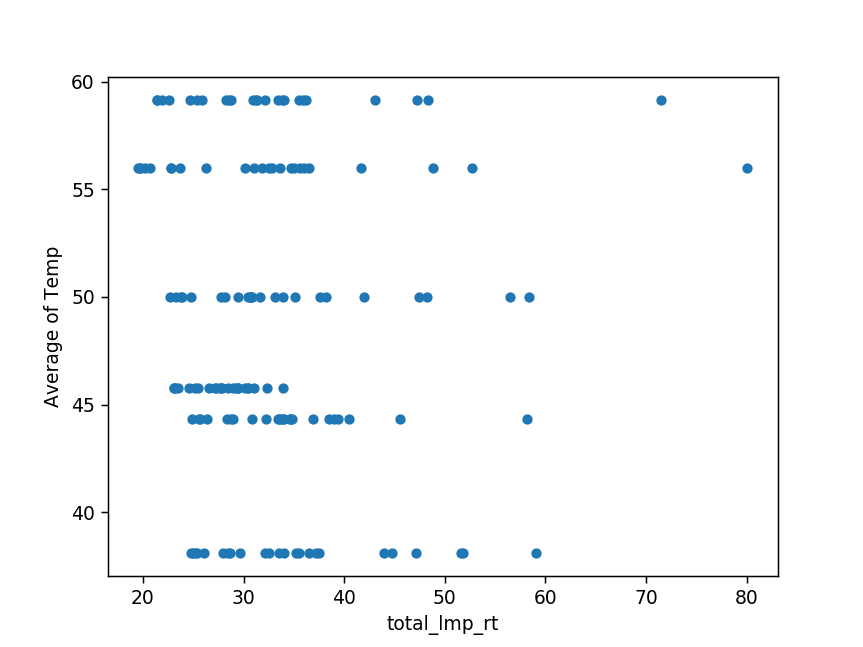

In [94]:
combined_data.plot.scatter('total_lmp_rt', 'Average of Temp')

<IPython.core.display.Javascript object>


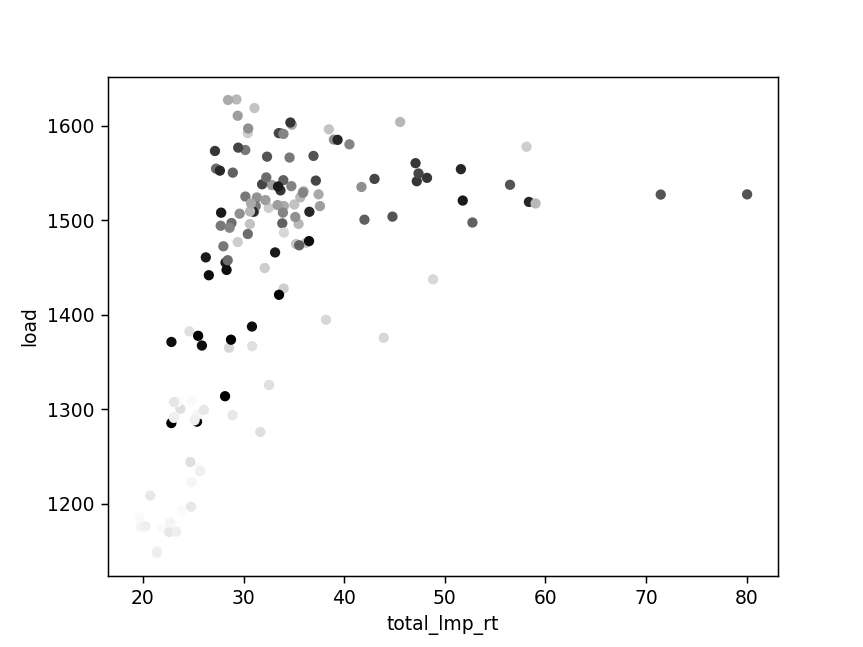

In [92]:
# load_price
# load_price.plot.line(x=load_price['total_lmp_rt'], y=load_price['load'], grid=True, figsize=(20,10), title="Price vs Load Plot")
# plt.show()

combined_data.plot.scatter('total_lmp_rt', 'load', c=combined_data['time'])
# load_price.plot('total_lmp_rt', 'load', kind='line')
# load_price

<IPython.core.display.Javascript object>


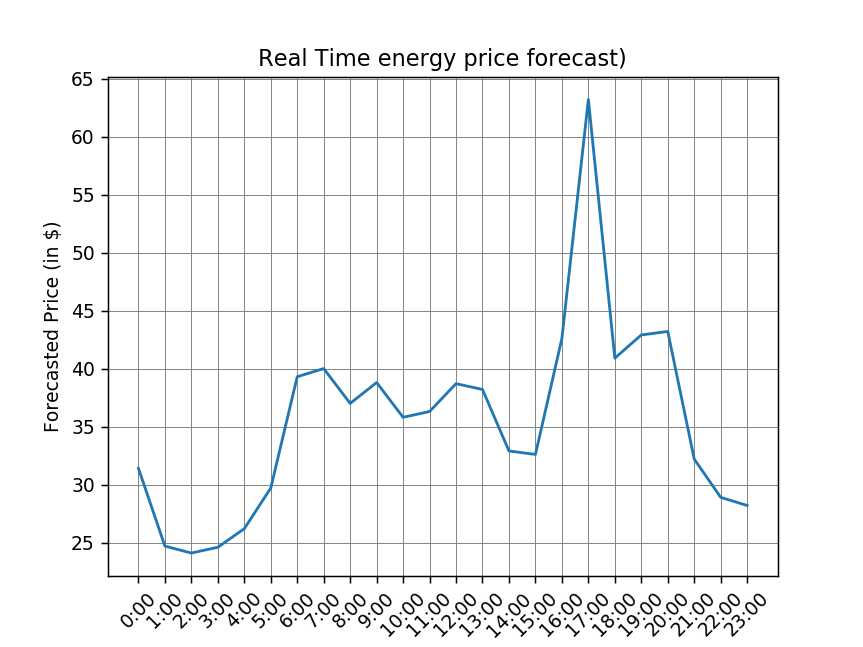

In [64]:
%matplotlib notebook
plt.plot(merged_data['Time'],merged_data['forecast_rt_lmp'])
# Create a legend
# Incorporate the other graph properties
plt.title("Real Time energy price forecast)")
plt.ylabel("Forecasted Price (in $)")
plt.xlabel("Time of the Day")
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.figsize=(100,150)
_ = plt.xticks(rotation=45)